In [2]:
# Load the required packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Read in the Cohorts data from Retool
cohort_data = pd.read_csv ('/Users/rosi/Downloads/LTV_ Retention Rate inc. FR (1).csv')

# Reshape df
cohort = cohort_data.pivot(index='cohort', columns='period', values='perc_retention').sort_index(ascending = True)

# Replace NaNs with 0 
cohort_filled = cohort.fillna(0)

<AxesSubplot:title={'center':'% Retention Cohorts'}, xlabel='period', ylabel='cohort'>

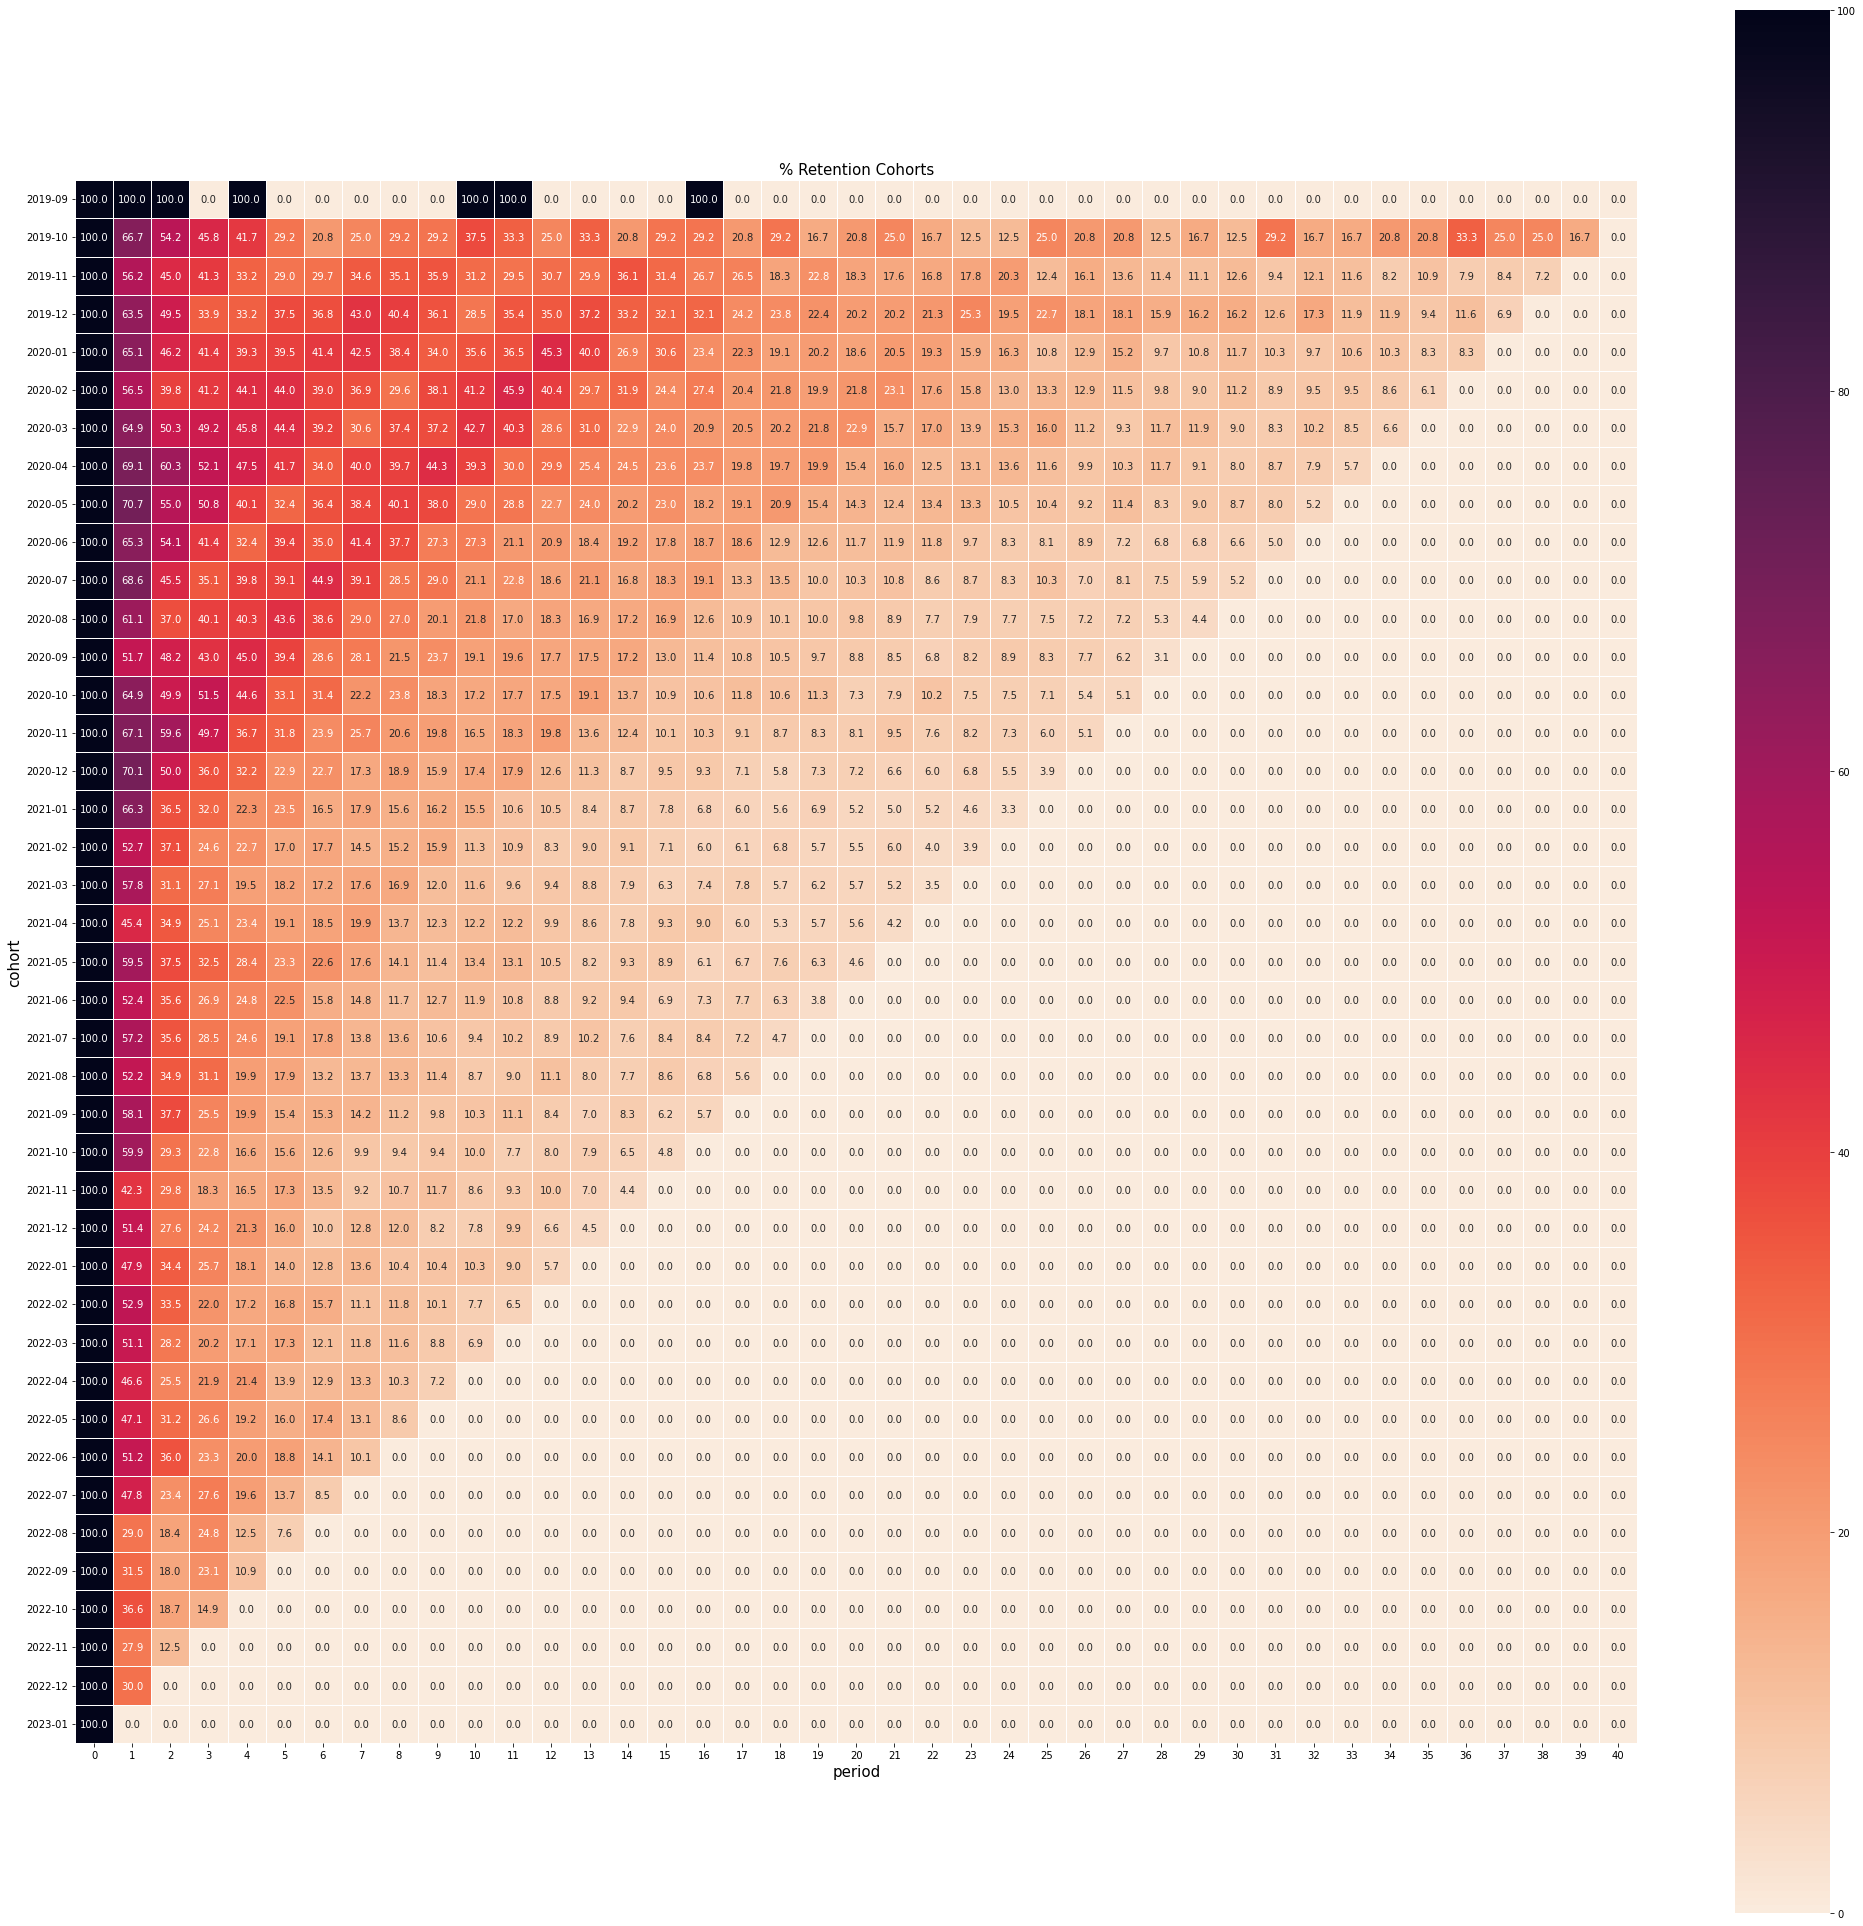

In [7]:
plt.figure(figsize = (35,35))

plt.xlabel('period', size = 15)

plt.ylabel('cohort', size = 15)

plt.title('% Retention Cohorts', size = 15)
                                  
sns.heatmap(cohort_filled, annot = True, fmt = ".1f", linewidths = .5, square = True, cmap = sns.cm.rocket_r)

In [8]:
# To get the marginal retention Matrix, we need the actual number of users in each period. 
# We can get this from the cohort_data df

cohort_data['total_cohort_users'] = cohort_data['total_cohort_users'].fillna(1.0)

# Make a new column for actual number of users
cohort_data['num_users'] = (cohort_data['total_cohort_users'] * cohort_data['perc_retention'])/100

# Reshape the df
cohort_users = cohort_data.pivot(index = 'cohort', columns = 'period', values = 'num_users').sort_index(ascending = True)

# Replace NaNs with 0 
cohort_users = cohort_users.fillna(0)

# Let's go with the 2019-10 cohort onwards 

cohort_sub = cohort_users.copy()

cohort_sub = cohort_sub.iloc[1:]

cohort_sub = cohort_sub.iloc[:,:-1]


In [9]:
df_zero = pd.DataFrame(np.zeros((cohort_sub.shape[0],cohort_sub.shape[1])), index = cohort_sub.index)

# Get Marginal Retention by dividing a column that corresponds to t+1 period by t i.e how many customers who 
#reched period t moved to t+1?

df_marginal = df_zero.copy()

# Dividing each column except ind = 0 by the previous one 

for i in cohort_sub.columns.values:
    if i == 0:
        df_marginal.iloc[:,i] = cohort_sub[i].divide(cohort_sub[i], axis = 0)
    else:
        df_marginal.iloc[:,i] = cohort_sub[i].divide(cohort_sub[i-1], axis = 0)
df_marginal

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
cohort,,,,,,,,,,,,,,,,,,,,,
2019-10,1.0,0.6667,0.812509,0.846040,0.909230,0.700024,0.714090,1.200192,1.166800,1.000000,...,0.749850,2.333600,0.571478,1.000000,1.249550,1.000000,1.600096,0.750075,1.000000,0.6668
2019-11,1.0,0.5619,0.801744,0.917647,0.802371,0.873078,1.025552,1.166667,1.014430,1.021053,...,1.132855,0.745642,1.289054,0.958780,0.702494,1.332925,0.727273,1.063131,0.852732,0.0000
2019-12,1.0,0.6354,0.778407,0.686211,0.978491,1.130684,0.980559,1.166757,0.941108,0.892901,...,1.000000,0.777846,1.371044,0.687248,1.000000,0.788413,1.230032,0.593939,0.000000,NaN
2020-01,1.0,0.6506,0.710267,0.895477,0.949976,1.005851,1.046535,1.027791,0.902657,0.886168,...,1.085185,0.882253,0.934236,1.094203,0.978240,0.800774,1.000000,0.000000,NaN,NaN
2020-02,1.0,0.5651,0.704654,1.034405,1.070648,0.996599,0.888510,0.945198,0.800867,1.289919,...,1.236726,0.794275,1.068694,1.000000,0.904110,0.714452,0.000000,NaN,NaN,NaN
2020-03,1.0,0.6493,0.775142,0.978144,0.930327,0.968559,0.882777,0.782431,1.220300,0.994116,...,0.749791,0.926339,1.226506,0.836935,0.779343,0.000000,NaN,NaN,NaN,NaN
2020-04,1.0,0.6912,0.872685,0.863064,0.912217,0.878922,0.815046,1.174309,0.993242,1.117440,...,0.880926,1.090113,0.907003,0.716456,0.000000,NaN,NaN,NaN,NaN,NaN
2020-05,1.0,0.7070,0.778501,0.923328,0.788272,0.808038,1.124807,1.055205,1.042686,0.949576,...,0.957918,0.921387,0.651192,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2020-06,1.0,0.6526,0.829605,0.765238,0.782283,1.215674,0.889340,1.180080,0.912696,0.723105,...,0.967836,0.761329,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# We then extrapolate to fill in the gaps in the df above: take an average of the previous N rows

N = 3 
df_marginal_e = df_marginal.copy()

for row_n in range(df_marginal.shape[0])[1:]:
    row = df_marginal_e.iloc[row_n,:]
    mask = (row.isna()) | (row ==0) 
    indx = np.where(mask)[0]
    if row_n <= N:
        df_marginal_e.iloc[row_n,indx] = np.sum(df_marginal_e.iloc[:row_n,indx], axis = 0)/np.count_nonzero(df_marginal_e.iloc[:row_n, indx], axis =0)
    else:
        df_marginal_e.iloc[row_n, indx] = np.sum(df_marginal_e.iloc[row_n - N:row_n, indx], axis = 0)/np.count_nonzero(df_marginal_e.iloc[row_n - N:row_n, indx], axis = 0)
        
        
df_marginal_e
    

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
cohort,,,,,,,,,,,,,,,,,,,,,
2019-10,1.0,0.6667,0.812509,0.846040,0.909230,0.700024,0.714090,1.200192,1.166800,1.000000,...,0.749850,2.333600,0.571478,1.000000,1.249550,1.000000,1.600096,0.750075,1.000000,0.6668
2019-11,1.0,0.5619,0.801744,0.917647,0.802371,0.873078,1.025552,1.166667,1.014430,1.021053,...,1.132855,0.745642,1.289054,0.958780,0.702494,1.332925,0.727273,1.063131,0.852732,0.6668
2019-12,1.0,0.6354,0.778407,0.686211,0.978491,1.130684,0.980559,1.166757,0.941108,0.892901,...,1.000000,0.777846,1.371044,0.687248,1.000000,0.788413,1.230032,0.593939,0.926366,0.6668
2020-01,1.0,0.6506,0.710267,0.895477,0.949976,1.005851,1.046535,1.027791,0.902657,0.886168,...,1.085185,0.882253,0.934236,1.094203,0.978240,0.800774,1.000000,0.802382,0.926366,0.6668
2020-02,1.0,0.5651,0.704654,1.034405,1.070648,0.996599,0.888510,0.945198,0.800867,1.289919,...,1.236726,0.794275,1.068694,1.000000,0.904110,0.714452,0.985768,0.819818,0.901821,0.6668
2020-03,1.0,0.6493,0.775142,0.978144,0.930327,0.968559,0.882777,0.782431,1.220300,0.994116,...,0.749791,0.926339,1.226506,0.836935,0.779343,0.767880,1.071933,0.738713,0.918184,0.6668
2020-04,1.0,0.6912,0.872685,0.863064,0.912217,0.878922,0.815046,1.174309,0.993242,1.117440,...,0.880926,1.090113,0.907003,0.716456,0.887231,0.761035,1.019234,0.786971,0.915457,0.6668
2020-05,1.0,0.7070,0.778501,0.923328,0.788272,0.808038,1.124807,1.055205,1.042686,0.949576,...,0.957918,0.921387,0.651192,0.851130,0.856894,0.747789,1.025645,0.781834,0.911821,0.6668
2020-06,1.0,0.6526,0.829605,0.765238,0.782283,1.215674,0.889340,1.180080,0.912696,0.723105,...,0.967836,0.761329,0.928234,0.801507,0.841156,0.758901,1.038937,0.769173,0.915154,0.6668


In [11]:
#Now that we have the extrapolated marginal retention and cohort retention matrices, we can extrapolate 
# a retention matrix for cohorts. Like before, we'll only focus on the 2019-10 cohort onwards, since the 2019-09 
# cohort has only one user.
# Get copy of cohort filled

cohort_filled_sub = cohort_filled.copy()

# Remove the first row and the last column 

cohort_filled_sub = cohort_filled_sub.iloc[1:]

cohort_filled_sub = cohort_filled_sub.iloc[:,:-1]

columns = cohort_filled_sub.columns.values

for column in columns[1:]:
    row_indx = np.where((cohort_filled_sub.loc[:,column].isna())| (cohort_filled_sub.loc[:, column]==0))[0]
    cohort_filled_sub.iloc[row_indx, column] = cohort_filled_sub.iloc[row_indx, column - 1] * df_marginal_e.iloc[row_indx, column]
    
cohort_filled_sub


period,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
cohort,,,,,,,,,,,,,,,,,,,,,
2019-10,100.0,66.67,54.170000,45.830000,41.670000,29.170000,20.830000,25.000000,29.170000,29.170000,...,12.500000,29.170000,16.670000,16.670000,20.830000,20.830000,33.330000,25.000000,25.000000,16.670000
2019-11,100.0,56.19,45.050000,41.340000,33.170000,28.960000,29.700000,34.650000,35.150000,35.890000,...,12.620000,9.410000,12.130000,11.630000,8.170000,10.890000,7.920000,8.420000,7.180000,4.787624
2019-12,100.0,63.54,49.460000,33.940000,33.210000,37.550000,36.820000,42.960000,40.430000,36.100000,...,16.250000,12.640000,17.330000,11.910000,11.910000,9.390000,11.550000,6.860000,6.354869,4.237427
2020-01,100.0,65.06,46.210000,41.380000,39.310000,39.540000,41.380000,42.530000,38.390000,34.020000,...,11.720000,10.340000,9.660000,10.570000,10.340000,8.280000,8.280000,6.643722,6.154517,4.103832
2020-02,100.0,56.51,39.820000,41.190000,44.100000,43.950000,39.050000,36.910000,29.560000,38.130000,...,11.180000,8.880000,9.490000,9.490000,8.580000,6.130000,6.042759,4.953960,4.467585,2.978986
2020-03,100.0,64.93,50.330000,49.230000,45.800000,44.360000,39.160000,30.640000,37.390000,37.170000,...,8.960000,8.300000,10.180000,8.520000,6.640000,5.098721,5.465489,4.037428,3.707102,2.471896
2020-04,100.0,69.12,60.320000,52.060000,47.490000,41.740000,34.020000,39.950000,39.680000,44.340000,...,7.990000,8.710000,7.900000,5.660000,5.021727,3.821711,3.895217,3.065422,2.806262,1.871216
2020-05,100.0,70.70,55.040000,50.820000,40.060000,32.370000,36.410000,38.420000,40.060000,38.040000,...,8.650000,7.970000,5.190000,4.417366,3.785216,2.830543,2.903133,2.269767,2.069621,1.380023
2020-06,100.0,65.26,54.140000,41.430000,32.410000,39.400000,35.040000,41.350000,37.740000,27.290000,...,6.620000,5.040000,4.678298,3.749689,3.154074,2.393630,2.486832,1.912803,1.750509,1.167240


<AxesSubplot:title={'center':'% Extrapolated Retention'}, xlabel='period', ylabel='cohort'>

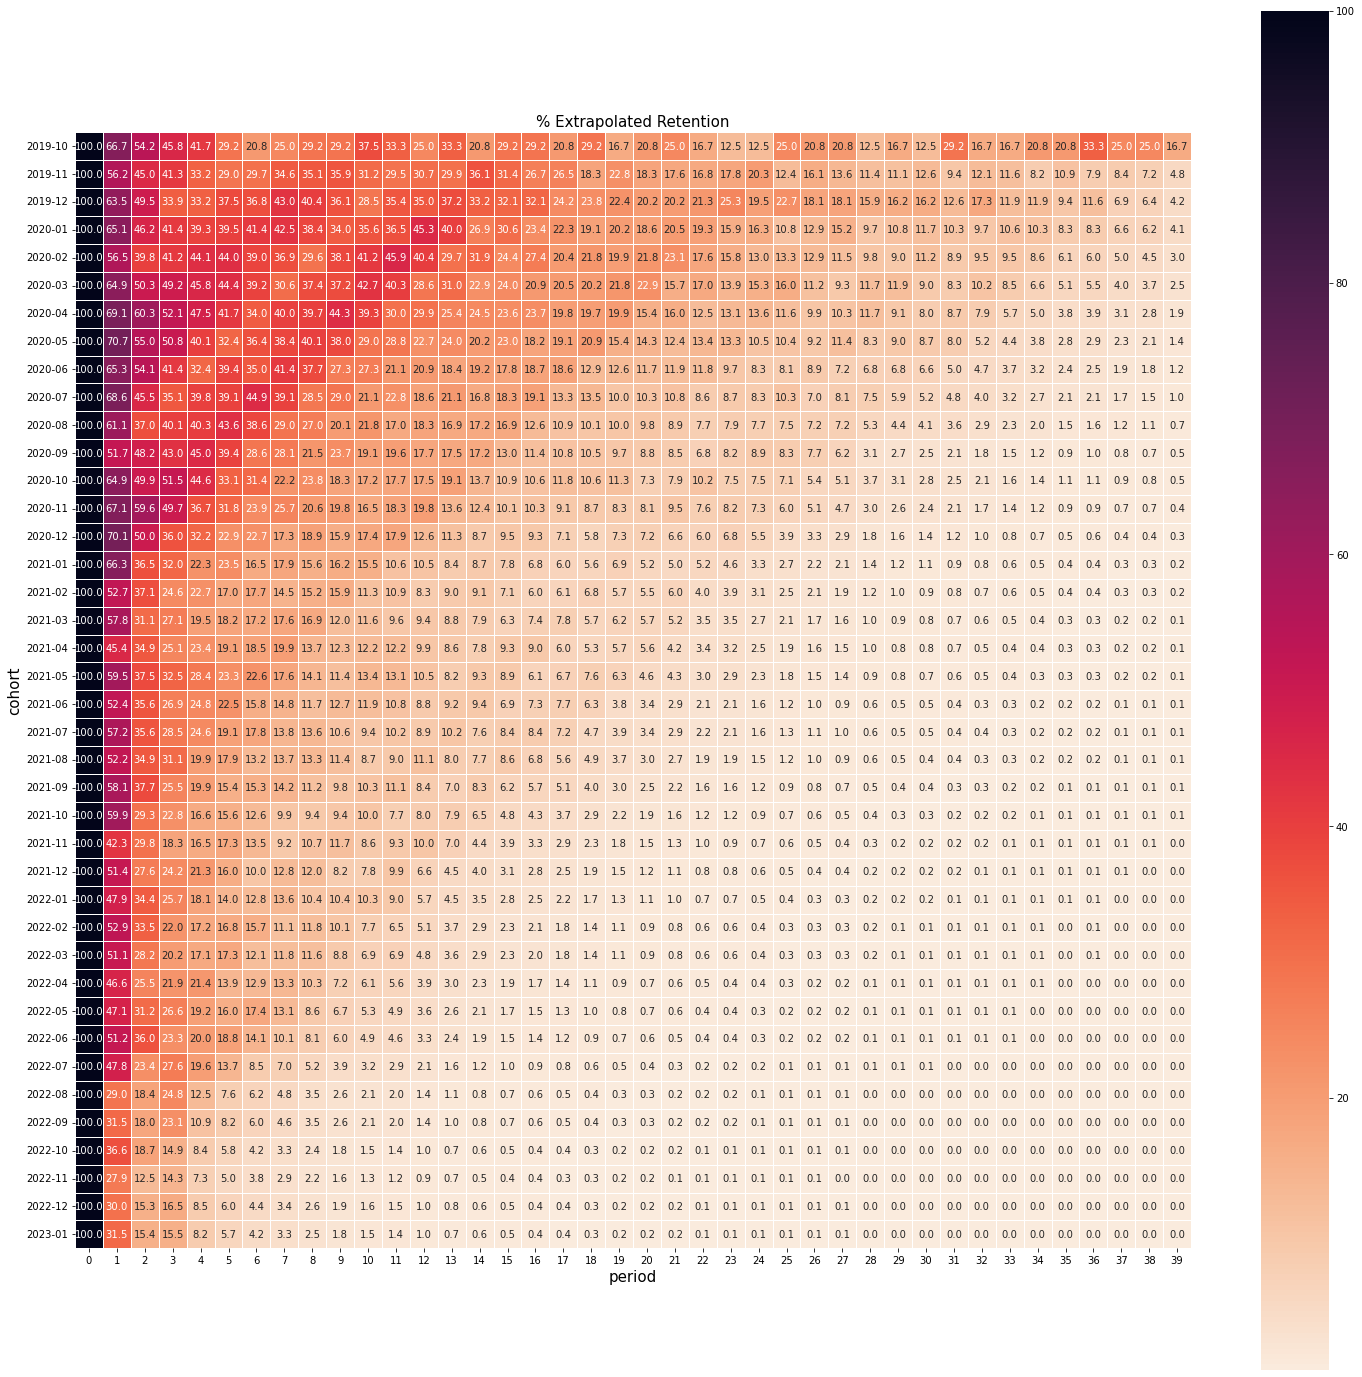

In [12]:
plt.figure(figsize = (25,25))

plt.xlabel('Period', size = 15)

plt.ylabel('Cohort', size = 15)

plt.title('% Extrapolated Retention', size = 15)
                                  
sns.heatmap(cohort_filled_sub, annot = True, fmt = ".1f", linewidths = .5, square = True, cmap = sns.cm.rocket_r)

In [13]:
# Make a copy of the previous df and divide everything by 100

lifetime_cohorts = cohort_filled_sub.copy()

lifetime_cohorts = lifetime_cohorts.divide(100.00, axis =1)

# Lifetime of an average customer in a cohort, or an average cohort lifetime, in a sum of retention percentages across maturity

lifetime = lifetime_cohorts.sum(axis = 1)

In [14]:
lifetime = lifetime.to_frame().reset_index()
lifetime

,cohort,0
0,2019-10,11.166800
1,2019-11,9.718876
2,2019-12,10.838823
3,2020-01,10.237821
4,2020-02,9.921033
5,2020-03,9.803206
6,2020-04,9.584616
7,2020-05,8.769057
8,2020-06,7.858031
9,2020-07,7.578871


In [15]:
import pandas as pd

# Dataframe example
df = lifetime

# Save dataframe as csv file in the current folder
df.to_csv('LT', index = False, encoding='utf-8') # False: not include index
print(df)

#Note: to Save dataframe as csv file in other folder use instead:

''' 
df.to_csv('Untitled/LT.csv', index = False, encoding='utf-8') # Replace 'Path' by the wanted folder
''';



     cohort          0
0   2019-10  11.166800
1   2019-11   9.718876
2   2019-12  10.838823
3   2020-01  10.237821
4   2020-02   9.921033
5   2020-03   9.803206
6   2020-04   9.584616
7   2020-05   8.769057
8   2020-06   7.858031
9   2020-07   7.578871
10  2020-08   6.829101
11  2020-09   6.580237
12  2020-10   6.597016
13  2020-11   6.363218
14  2020-12   5.457594
15  2021-01   4.723024
16  2021-02   4.335284
17  2021-03   4.299797
18  2021-04   4.277992
19  2021-05   4.640114
20  2021-06   4.183606
21  2021-07   4.186265
22  2021-08   3.989344
23  2021-09   3.903857
24  2021-10   3.542471
25  2021-11   3.313659
26  2021-12   3.350781
27  2022-01   3.371052
28  2022-02   3.308402
29  2022-03   3.170178
30  2022-04   3.050986
31  2022-05   3.143953
32  2022-06   3.139845
33  2022-07   2.737140
34  2022-08   2.208803
35  2022-09   2.195833
36  2022-10   2.040504
37  2022-11   1.847159
38  2022-12   1.970480
39  2023-01   1.961125


In [17]:
# Read in GPM data from Retool 

gpm = pd.read_csv('/Users/rosi/Downloads/LTV GPM inc. FR (1).csv')

gpm_mod = gpm.copy()

gpm_mod = gpm_mod.iloc[1:]


In [18]:
ltv = gpm_mod.merge(lifetime, on='cohort', how='left')


In [19]:
ltv.rename(columns={0:'lifetime'}, inplace=True)

In [20]:
ltv['ltv'] = ltv['gpm_per_period_user'] * ltv['lifetime']
ltv

,cohort,cohort_size,cohort_rev,total_trade_fee,num_periods,gpm_per_period,gpm_per_period_user,lifetime,ltv
0,2019-10,24,2435.835500,1056.59,39,34.481137,1.436714,11.166800,16.043499
1,2019-11,404,133248.644276,42567.27,38,2325.163443,5.755355,9.718876,55.935584
2,2019-12,277,67137.764015,27549.62,37,1041.793264,3.760987,10.838823,40.764667
3,2020-01,435,85792.998964,33355.87,36,1417.219702,3.257976,10.237821,33.354578
4,2020-02,653,170858.105289,62240.92,35,3017.144036,4.620435,9.921033,45.839487
5,2020-03,904,356383.795103,108945.97,34,7069.652146,7.820412,9.803206,76.665109
6,2020-04,1114,300989.071333,118745.72,33,5360.098569,4.811579,9.584616,46.117131
7,2020-05,1041,233870.250307,83117.96,32,4568.251221,4.388330,8.769057,38.481512
8,2020-06,1330,202527.742153,87302.90,31,3600.776317,2.707351,7.858031,21.274444
9,2020-07,1433,218526.572529,89825.30,30,4151.653953,2.897177,7.578871,21.957327


In [21]:
import pandas as pd

# Dataframe example
df = ltv

# Save dataframe as csv file in the current folder
df.to_csv('ltv', index = False, encoding='utf-8') # False: not include index
print(df)

#Note: to Save dataframe as csv file in other folder use instead:

''' 
df.to_csv('Untitled/ltv.csv', index = False, encoding='utf-8') # Replace 'Path' by the wanted folder
''';



     cohort  cohort_size     cohort_rev  total_trade_fee  num_periods  \
0   2019-10           24    2435.835500          1056.59           39   
1   2019-11          404  133248.644276         42567.27           38   
2   2019-12          277   67137.764015         27549.62           37   
3   2020-01          435   85792.998964         33355.87           36   
4   2020-02          653  170858.105289         62240.92           35   
5   2020-03          904  356383.795103        108945.97           34   
6   2020-04         1114  300989.071333        118745.72           33   
7   2020-05         1041  233870.250307         83117.96           32   
8   2020-06         1330  202527.742153         87302.90           31   
9   2020-07         1433  218526.572529         89825.30           30   
10  2020-08         1636  192639.508811         96262.19           29   
11  2020-09         1233  170996.978681         71061.70           28   
12  2020-10          744   74183.568985         389

In [46]:
((ltv['cohort_size'] * ltv['ltv']).sum())/ltv['cohort_size'].sum()

6.7747639805266475

In [47]:
((ltv['cohort_size'] * ltv['lifetime']).sum())/ltv['cohort_size'].sum()

3.9764628553608348

In [48]:
df_marginal_e

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
cohort,,,,,,,,,,,,,,,,,,,,,
2019-10,1.0,0.6667,0.812509,0.846040,0.909230,0.700024,0.714090,1.200192,1.166800,1.000000,...,0.600096,1.333600,0.749850,2.333600,0.571478,1.000000,1.249550,1.000000,1.600096,0.375038
2019-11,1.0,0.5619,0.801744,0.917647,0.802371,0.873078,1.025552,1.166667,1.014430,1.021053,...,0.836885,0.978051,1.132855,0.745642,1.289054,0.958780,0.702494,1.302326,0.465226,0.375038
2019-12,1.0,0.6354,0.778407,0.686211,0.978491,1.130684,0.980559,1.166757,0.941108,0.892901,...,0.879778,1.023300,1.000000,0.777846,1.371044,0.687248,1.000000,0.393787,1.032661,0.375038
2020-01,1.0,0.6506,0.710267,0.895477,0.949976,1.005851,1.046535,1.027791,0.902657,0.886168,...,0.636783,1.118012,1.085185,0.882253,0.934236,1.094203,0.413434,0.898704,1.032661,0.375038
2020-02,1.0,0.5651,0.704654,1.034405,1.070648,0.996599,0.888510,0.945198,0.800867,1.289919,...,0.852916,0.922449,1.236726,0.794275,1.068694,0.355111,0.705309,0.864939,0.843516,0.375038
2020-03,1.0,0.6493,0.775142,0.978144,0.930327,0.968559,0.882777,0.782431,1.220300,0.994116,...,1.262648,1.018755,0.749791,0.926339,0.492771,0.712187,0.706248,0.719143,0.969612,0.375038
2020-04,1.0,0.6912,0.872685,0.863064,0.912217,0.878922,0.815046,1.174309,0.993242,1.117440,...,1.130814,0.777207,0.880926,0.539424,0.831900,0.720500,0.608330,0.827595,0.948596,0.375038
2020-05,1.0,0.7070,0.778501,0.923328,0.788272,0.808038,1.124807,1.055205,1.042686,0.949576,...,0.722660,1.093220,0.489480,0.753346,0.797788,0.595933,0.673296,0.803892,0.920575,0.375038
2020-06,1.0,0.6526,0.829605,0.765238,0.782283,1.215674,0.889340,1.180080,0.912696,0.723105,...,0.937673,0.410635,0.706732,0.739703,0.707487,0.676207,0.662625,0.783544,0.946261,0.375038


In [49]:
import pandas as pd

# Dataframe example
df = df_marginal_e.reset_index()

# Save dataframe as csv file in the current folder
df.to_csv('retention_marg', index = False, encoding='utf-8') # False: not include index
print(df)

#Note: to Save dataframe as csv file in other folder use instead:

''' 
df.to_csv('Untitled/retention_marg.csv', index = False, encoding='utf-8') # Replace 'Path' by the wanted folder
''';



     cohort    0       1         2         3         4         5         6  \
0   2019-10  1.0  0.6667  0.812509  0.846040  0.909230  0.700024  0.714090   
1   2019-11  1.0  0.5619  0.801744  0.917647  0.802371  0.873078  1.025552   
2   2019-12  1.0  0.6354  0.778407  0.686211  0.978491  1.130684  0.980559   
3   2020-01  1.0  0.6506  0.710267  0.895477  0.949976  1.005851  1.046535   
4   2020-02  1.0  0.5651  0.704654  1.034405  1.070648  0.996599  0.888510   
5   2020-03  1.0  0.6493  0.775142  0.978144  0.930327  0.968559  0.882777   
6   2020-04  1.0  0.6912  0.872685  0.863064  0.912217  0.878922  0.815046   
7   2020-05  1.0  0.7070  0.778501  0.923328  0.788272  0.808038  1.124807   
8   2020-06  1.0  0.6526  0.829605  0.765238  0.782283  1.215674  0.889340   
9   2020-07  1.0  0.6860  0.663265  0.771429  1.133333  0.984163  1.146105   
10  2020-08  1.0  0.6106  0.605634  1.084370  1.004489  1.083416  0.885197   
11  2020-09  1.0  0.5174  0.931194  0.892071  1.047231  0.875805

<AxesSubplot:title={'center':'Marginal Retention Cohorts'}, ylabel='cohort'>

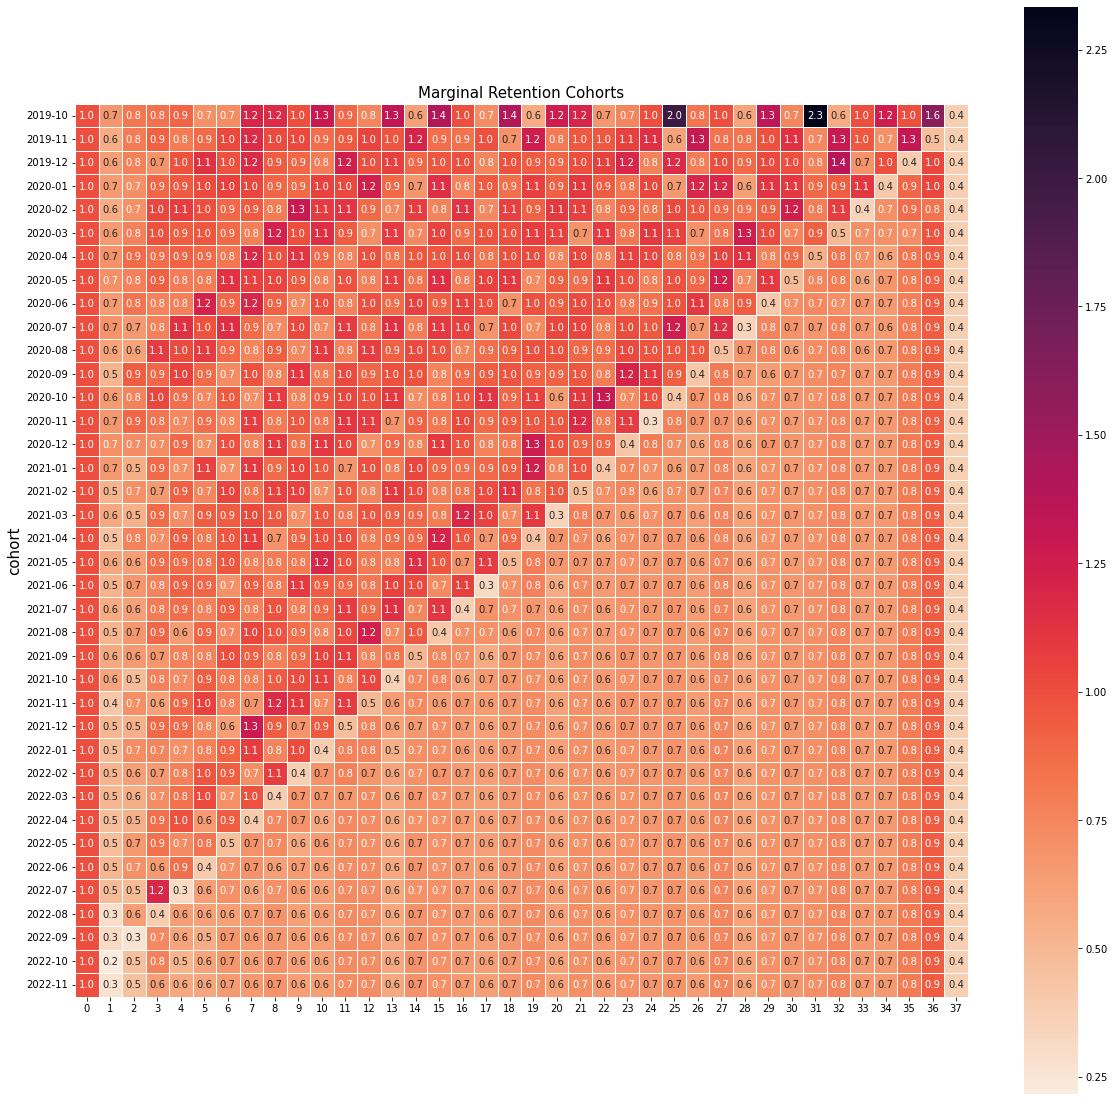

In [50]:
plt.figure(figsize = (20,20))

plt.xlabel('cohort', size = 15)

plt.ylabel('cohort', size = 15)

plt.title('Marginal Retention Cohorts', size = 15)
                                  
sns.heatmap(df_marginal_e, annot = True, fmt = ".1f", linewidths = .5, square = True, cmap = sns.cm.rocket_r)